/var/folders/21/mw1w2bd10n97_p6l1x3p52t80000gn/T/ipykernel_75565/1814833197.py:21: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3687.)
  ax[0].imshow(lr[10].T)


<Figure size 640x480 with 0 Axes>

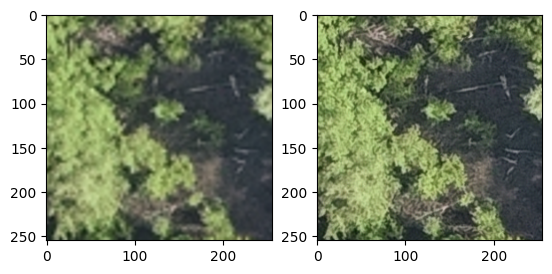

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from data import SRCNNDataset
import torch

data = np.load("../256dataset_images_small.npy")
data = np.transpose(data, (0, 2, 3, 1))

plt.figure()
f, ax = plt.subplots(1, 2)

dataset = SRCNNDataset(hr_images=data, scale_factor=3)
train_dataset, validation_dataset, test_dataset = torch.utils.data.random_split(dataset, [0.8, 0.1, 0.1])
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=False)
validation_dataloader = torch.utils.data.DataLoader(validation_dataset, batch_size=16, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False)

lr, hr = next(iter(train_dataloader))

ax[0].imshow(lr[10].T)
ax[1].imshow(hr[10].T)



In [2]:
from model import SRCNN

def train(model, train_set, validation_set, epochs, lr):
    loss_function = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    training_loss = []
    validation_loss = []
    for epoch in range(1, epochs+1):
        print(f"Epoch {epoch} / {epochs}")
        epoch_train_loss = 0
        for index, batch in enumerate(train_set):
            print(f"Batch {index} / {len(train_set)}", end="\r")

            features, labels = batch
            y_pred = model(features)
            loss = loss_function(y_pred, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_train_loss+=loss
        training_loss.append(epoch_train_loss/len(train_set))

        epoch_validation_loss = 0
        for index, batch in enumerate(validation_set):
            y_pred = model(features)
            loss = loss_function(y_pred, labels)
            epoch_validation_loss+=loss
        validation_loss.append(epoch_validation_loss/len(validation_set))

        print(f"Training loss: {epoch_train_loss/len(train_set)} | Validation loss: {epoch_validation_loss/len(validation_set)}")
    
    plt.plot(np.arange(1, epochs), training_loss, label="training loss")
    plt.plot(np.arange(1, epochs), validation_loss, label="training loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

model = SRCNN()
train(model, train_dataloader, validation_dataloader, epochs=100, lr=0.0001)
torch.save(model, "SRCNN.pt")


Epoch 1 / 100


KeyboardInterrupt: 